In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline
from sklearn import datasets
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
df=pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
df['target']=pd.Series(iris.target)
species = []
for i in range(len(df)):
    if df.iloc[i]['target'] == 0:
        species.append('setosa')
    elif df.iloc[i]['target'] == 1:
        species.append('versicolor')
    elif df.iloc[i]['target'] == 2:
        species.append('virginica')
df['Species'] = species

In [4]:
df

,sepal_length,sepal_width,petal_length,petal_width,target,Species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
Species         0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates()

,sepal_length,sepal_width,petal_length,petal_width,target,Species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Text(0, 0.5, 'Sepal_length')

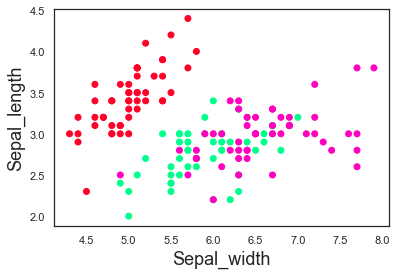

In [9]:
plt.scatter(x=df['sepal_length'], y=df['sepal_width'] ,c=iris.target, cmap='gist_rainbow') 

plt.xlabel('Sepal_width', fontsize=18)
plt.ylabel('Sepal_length', fontsize=18)

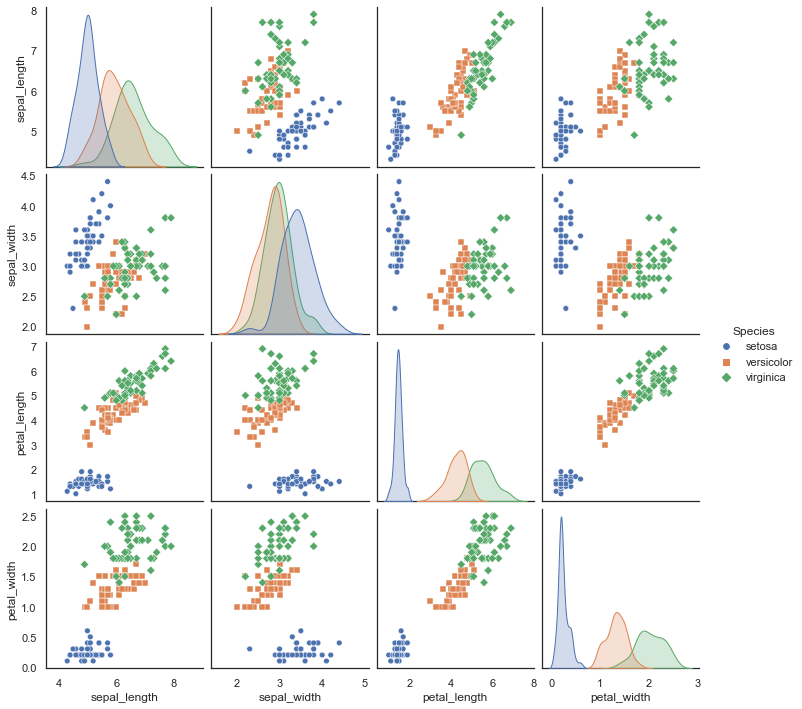

In [10]:
sns.pairplot(df.drop(['target'],axis=1), hue='Species', height=2.5, markers = ["8","s","D"])

In [11]:
x=iris.data

# Using the elbow method to estimate the value k

In [12]:
from sklearn.cluster import KMeans
kmeans5 = KMeans(n_clusters=5,init = 'k-means++', random_state = 0)
y = kmeans5.fit_predict(x)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 2 4 2 4 2 4 2 2 2 2 4 2 4 2 2 4 2 4 2 4 4
 4 4 4 4 4 2 2 2 2 4 2 4 4 4 2 2 2 4 2 2 2 2 2 4 2 2 1 4 3 1 1 3 2 3 1 3 1
 1 1 4 1 1 1 3 3 4 1 4 3 4 1 3 4 4 1 3 3 3 1 4 4 3 1 1 4 1 1 1 4 1 1 1 4 1
 1 4]


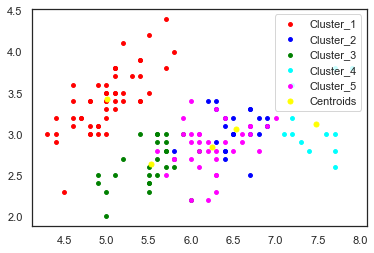

In [13]:
plt.scatter(x[y == 0,0], x[y==0,1], s = 15, c= 'red', label = 'Cluster_1')
plt.scatter(x[y == 1,0], x[y==1,1], s = 15, c= 'blue', label = 'Cluster_2')
plt.scatter(x[y == 2,0], x[y==2,1], s = 15, c= 'green', label = 'Cluster_3')
plt.scatter(x[y == 3,0], x[y==3,1], s = 15, c= 'cyan', label = 'Cluster_4')
plt.scatter(x[y == 4,0], x[y==4,1], s = 15, c= 'magenta', label = 'Cluster_5')

plt.scatter(kmeans5.cluster_centers_[:,0], kmeans5.cluster_centers_[:,1], s = 25, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

In [14]:
from sklearn.metrics import silhouette_score
Error =[]
s_scores = []
for i in range(2, 11):
    kmeans11 = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0).fit(x)
    Error.append(kmeans11.inertia_)
    silhouette_avg = silhouette_score(x, kmeans11.labels_)
    s_scores.append(silhouette_avg)


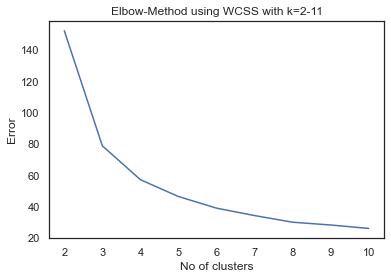

In [15]:
import matplotlib.pyplot as plt
plt.plot(range(2, 11), Error)
plt.title('Elbow-Method using WCSS with k=2-11')
plt.xlabel('No of clusters')
plt.ylabel('Error') #within cluster sum of squares
plt.show()

C:\Users\rajan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


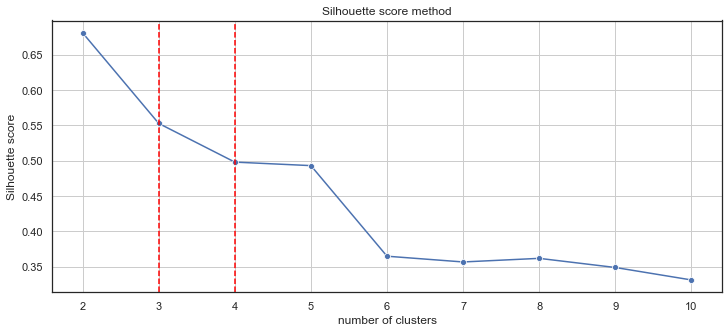

In [16]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(range(2 , 11), s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(3, ls="--", c="red")
ax.axvline(4, ls="--", c="red")
plt.grid()
plt.show()

In [17]:
kmeans3 = KMeans(n_clusters=3, random_state=21) #n_jobs = 4, n_jobs' was deprecated in version 0.23 and will be
y = kmeans3.fit_predict(x)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [18]:
kmeans3.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

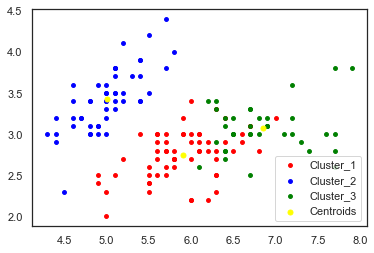

In [19]:
plt.scatter(x[y == 0,0], x[y==0,1], s = 15, c= 'red', label = 'Cluster_1')
plt.scatter(x[y == 1,0], x[y==1,1], s = 15, c= 'blue', label = 'Cluster_2')
plt.scatter(x[y == 2,0], x[y==2,1], s = 15, c= 'green', label = 'Cluster_3')
plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], s = 25, c = 'yellow', label = 'Centroids')

plt.legend()

plt.show()

# compare our original data versus our clustered results

Text(0.5, 1.0, 'Predicted')

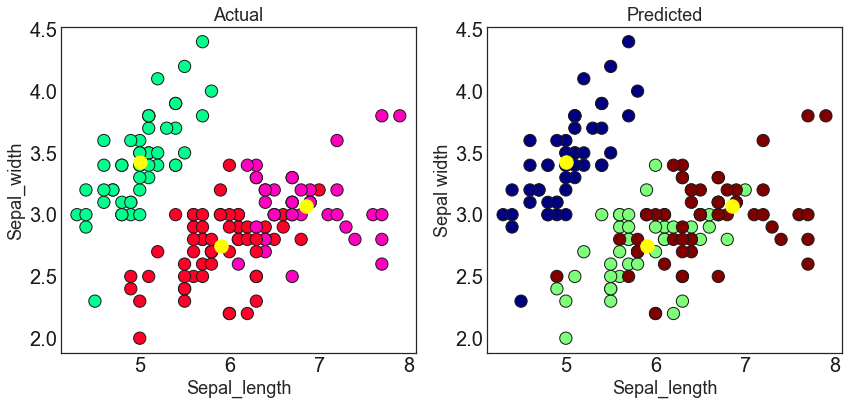

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(x=df['sepal_length'], y=df['sepal_width'], c=y, cmap='gist_rainbow',edgecolor='k', s=150) #you can also try cmap='rainbow'
axes[1].scatter(x=df['sepal_length'], y=df['sepal_width'], c=iris.target, cmap='jet',edgecolor='k', s=150)
axes[0].scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], s = 180, c = 'yellow', label = 'Centroids')
axes[1].scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], s = 180, c = 'yellow', label = 'Centroids')
axes[0].set_xlabel('Sepal_length', fontsize=18)
axes[0].set_ylabel('Sepal_width', fontsize=18)
axes[1].set_xlabel('Sepal_length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

# PCA

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components=2,whiten=True).fit(x)
pca_x = pca.transform(x)
pca_x

array([[-1.30533786,  0.64836932],
       [-1.31993521, -0.35930856],
       [-1.40496732, -0.29424412],
       [-1.33510889, -0.64613986],
       [-1.32702321,  0.6633044 ],
       [-1.10922246,  1.50488434],
       [-1.3716775 , -0.18160462],
       [-1.27714084,  0.33166784],
       [-1.40369908, -1.17396001],
       [-1.29980851, -0.23095919],
       [-1.2191728 ,  1.30947554],
       [-1.27062918,  0.02990145],
       [-1.35493432, -0.47727214],
       [-1.5677929 , -1.03811965],
       [-1.28618899,  2.39286603],
       [-1.16037307,  2.71623681],
       [-1.2758681 ,  1.64566141],
       [-1.28791362,  0.63304684],
       [-1.06981161,  1.77184386],
       [-1.25858365,  1.04251602],
       [-1.12351854,  0.79442356],
       [-1.23704894,  0.87897239],
       [-1.56396833,  0.27093722],
       [-1.11985996,  0.20037678],
       [-1.14564495, -0.07568135],
       [-1.21903752, -0.29641102],
       [-1.20063096,  0.26582861],
       [-1.24610158,  0.74646111],
       [-1.28365251,

In [23]:
pca_x.shape

(150, 2)

In [24]:
print(pca.components_)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


In [25]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.92461872 0.05306648]
0.977685206318795


In [26]:
y.shape

(150,)

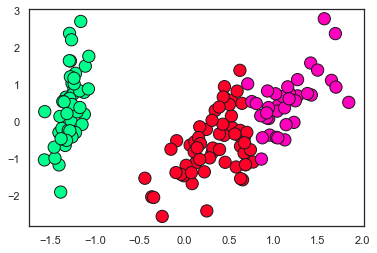

In [27]:
plt.scatter(pca_x[:,0], pca_x[:,1],c=y, cmap='gist_rainbow',edgecolor='k', s=150)